In [1]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.1/38.8 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.1/38.8 MB 944.1 kB/s eta 0:00:41
   ---------------------------------------- 0.2/38.8 MB 1.0 MB/s eta 0:00:38
   ---------------------------------------- 0.3/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.4/38.8 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.5/38.8 MB 1.2 MB/s eta 0:00:32
    ----------------

In [1]:
import cv2
import numpy as np
import os
import random

In [3]:
# Defining the path where the images will be save
# dataset_images/ : / means that its a directory
output_dir = 'dataset_images/'

# makes a new directory if one does not already exists
os.makedirs(output_dir, exist_ok=True)

shapes = ['line', 'circle', 'ellipse', 'square', 'rectangle', 'polygon', 'star']
for shape in shapes:
    os.makedirs(f'{output_dir}{shape}/', exist_ok=True)

# Making a circle
# image -> numpy array (opencv processes images as numpy array) the image will be drwn here
# center -> tuple having the coordinates of the circle's center
# radius -> integer
# color -> tuple(Blue,Green,Red)


def draw_hand_drawn_circle(image, center, radius, color):

    # #    loop to add offset to make the image hand drawn type
    # #    _ :- mens no loop variable is needed
    #     for _ in range(5):

    # #       returns a random integer which will be used to introduce variability
    #         offset = random.randint(-5, 5)

    # #        addinf the offset vale to the xand y coordinate of the center of the circle
    #         center_with_offset = (center[0] + offset, center[1] + offset)

    # #       opencv function to create circle
    # #       line type: Specifies the type of line used for drawing the circle( aa stands for anti-aliased line)
    #         cv2.circle(image, center_with_offset, radius, color, thickness=random.randint(1, 3), lineType=cv2.LINE_AA)

    num_points = 20
    points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        random_offset = random.randint(-5, 5)
        x = int(center[0] + (radius + random_offset) * np.cos(angle))
        y = int(center[1] + (radius + random_offset) * np.sin(angle))
        points.append((x, y))
    points = np.array(points, np.int32).reshape((-1, 1, 2))
    for _ in range(5):  # Draw multiple slightly offset wiggly circles
        offset_x = random.randint(-3, 3)
        offset_y = random.randint(-3, 3)
        offset_points = points + [offset_x, offset_y]
    cv2.polylines(image, [offset_points], isClosed=True, color=color, thickness=random.randint(1, 3), lineType=cv2.LINE_AA)


def draw_hand_drawn_line(image, start, end, color):

    num_segments = 5
    max_offset = 2

    points = [start]
    for i in range(1, num_segments):
        t = i / num_segments
        intermediate_point = (
            int(start[0] * (1 - t) + end[0] * t + random.randint(-max_offset, max_offset)),
            int(start[1] * (1 - t) + end[1] * t + random.randint(-max_offset, max_offset))
        )
        points.append(intermediate_point)
    points.append(end)

    for i in range(len(points) - 1):
        cv2.line(image, points[i], points[i + 1], color, thickness=random.randint(1, 3), lineType=cv2.LINE_AA)


# Making a rectangle
def draw_hand_drawn_rectangle(image, top_left, width, height, color):
    tl_x_variability = random.randint(-10, 10)
    tl_y_variability = random.randint(-10, 10)
    tr_x_variability = random.randint(-10, 10)
    tr_y_variability = random.randint(-10, 10)
    bl_x_variability = random.randint(-10, 10)
    bl_y_variability = random.randint(-10, 10)
    br_x_variability = random.randint(-10, 10)
    br_y_variability = random.randint(-10, 10)

    top_left = (top_left[0] + tl_x_variability, top_left[1] + tl_y_variability)
    top_right = (top_left[0] + width + tr_x_variability, top_left[1] + tr_y_variability)
    bottom_left = (top_left[0] + bl_x_variability, top_left[1] + height + bl_y_variability)
    bottom_right = (top_left[0] + width + br_x_variability, top_left[1] + height + br_y_variability)

    draw_hand_drawn_line(image, top_left, top_right, color)
    draw_hand_drawn_line(image, top_right, bottom_right, color)
    draw_hand_drawn_line(image, bottom_right, bottom_left, color)
    draw_hand_drawn_line(image, bottom_left, top_left, color)

# Making a star


def draw_hand_drawn_star(image, center, size, color):

    # #     list to store  points of the star
    #     points = []

    # #     running the loop 10 times (5 times for outer points and 5 for inner points)
    #     for i in range(10):

    # #       claculating the angle bw them
    #         angle = i * np.pi / 5

    #         length = size if i % 2 == 0 else size / 2

    # #        finding the x-y cordinates of the points
    #         x = int(center[0] + length * np.cos(angle))
    #         y = int(center[1] - length * np.sin(angle))
    #         points.append((x, y))

    #     for _ in range(5):
    #         offset_x = random.randint(-5, 5)
    #         offset_y = random.randint(-5, 5)
    #         offset_points = [(x + offset_x, y + offset_y) for (x, y) in points]
    #         cv2.polylines(image, [np.array(offset_points, np.int32)], isClosed=True, color=color, thickness=random.randint(1, 3), lineType=cv2.LINE_AA)

    points = []
    for i in range(10):
        angle = i * np.pi / 5
        length = size if i % 2 == 0 else size / 2
        length += random.randint(-10, 10)  # Adding variability to the length
        x = int(center[0] + length * np.cos(angle))
        y = int(center[1] - length * np.sin(angle))
        points.append((x, y))

    for j in range(10):
        start = points[j]
        end = points[(j + 1) % 10]  # Loop back to the first point
        draw_hand_drawn_line(image, start, end, color)

# MAke an ellipse


def draw_hand_drawn_ellipse(image, center, axes, angle, color):
    num_points = 10
    points = []
    for i in range(num_points):
        theta = 2 * np.pi * i / num_points
        random_offset = random.randint(-5, 5)
        x = int(center[0] + (axes[0] + random_offset) * np.cos(theta) * np.cos(angle) - (axes[1] + random_offset) * np.sin(theta) * np.sin(angle))
        y = int(center[1] + (axes[0] + random_offset) * np.cos(theta) * np.sin(angle) + (axes[1] + random_offset) * np.sin(theta) * np.cos(angle))
        points.append((x, y))
    points = np.array(points, np.int32).reshape((-1, 1, 2))
    for _ in range(5):  # Draw multiple slightly offset wiggly ellipses
        offset_x = random.randint(-3, 3)
        offset_y = random.randint(-3, 3)
        offset_points = points + [offset_x, offset_y]
        cv2.polylines(image, [offset_points], isClosed=True, color=color, thickness=random.randint(1, 3), lineType=cv2.LINE_AA)

# Making  a polygon


def draw_hand_drawn_polygon(image, center, sides, radius, color):
    points = []
    for i in range(sides):
        angle = i * 2 * np.pi / sides
        variable_radius = radius + random.randint(-10, 10)  # Adding variability to the radius
        x = int(center[0] + variable_radius * np.cos(angle))
        y = int(center[1] - variable_radius * np.sin(angle))
        points.append((x, y))

    for i in range(sides):
        start = points[i]
        end = points[(i + 1) % sides]  # Loop back to the first point
        draw_hand_drawn_line(image, start, end, color)


def create_hand_drawn_image(shape_type, file_path):
    img = np.ones((256, 256, 3), dtype=np.uint8) * 255
    color = (0, 0, 0)  # Black color for shapes

    shape_params = {
        'line': lambda: draw_hand_drawn_line(img, (50, 128), (200, 128), color),
        'circle': lambda: draw_hand_drawn_circle(img, (128, 128), 100, color),
        'ellipse': lambda: draw_hand_drawn_ellipse(img, (128, 128), (100, 50), 0, color),
        'square': lambda: draw_hand_drawn_rectangle(img, (50, 50), 100, 100, color),
        'rectangle': lambda: draw_hand_drawn_rectangle(img, (50, 50), 150, 100, color),
        'polygon': lambda: random.choice([draw_hand_drawn_polygon(img, (128, 128), 6, 100, color), draw_hand_drawn_polygon(img, (128, 128), 7, 100, color), draw_hand_drawn_polygon(img, (128, 128), 8, 100, color)]),
        'star': lambda: draw_hand_drawn_star(img, (128, 128), 100, color),
    }

    if shape_type in shape_params:
        shape_params[shape_type]()

    img = cv2.GaussianBlur(img, (5, 5), 0)

    cv2.imwrite(os.path.join(f'{output_dir}{shape_type}/', file_path), img)


shapes = ['star']
for shape in shapes:
    for i in range(20000):
        file_path = f'{shape}-{i}.png'
        create_hand_drawn_image(shape, file_path)

print('Image generation complete.')

Image generation complete.


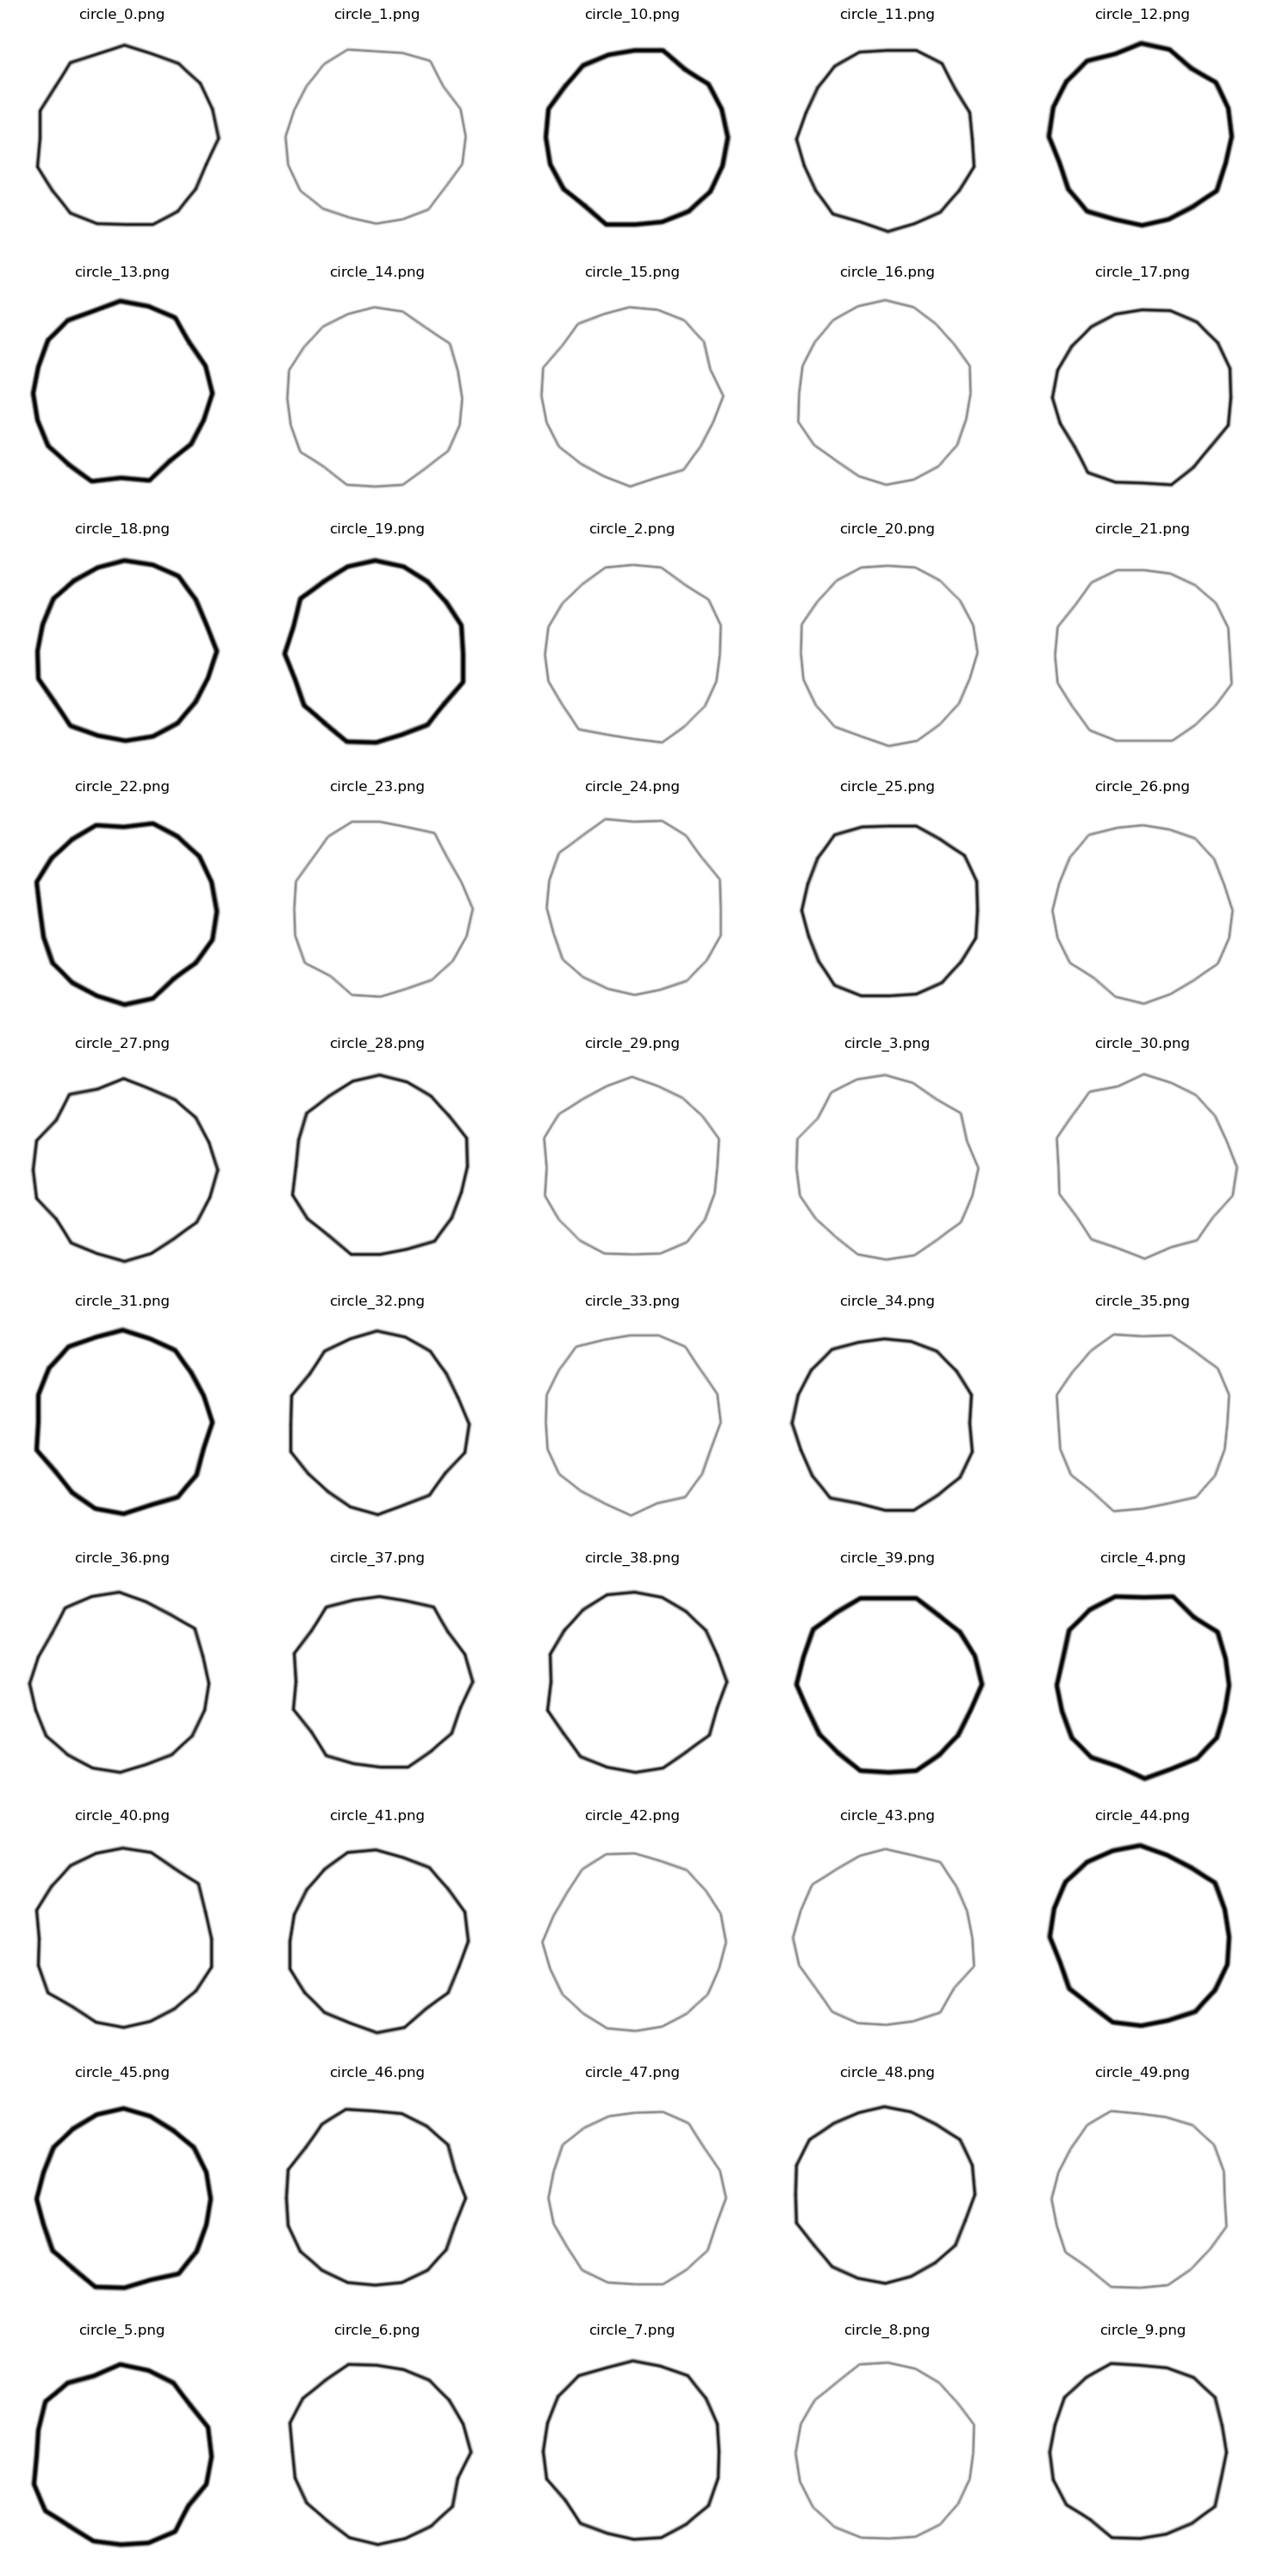

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'


circle_files = [f for f in os.listdir(output_dir) if 'circle' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


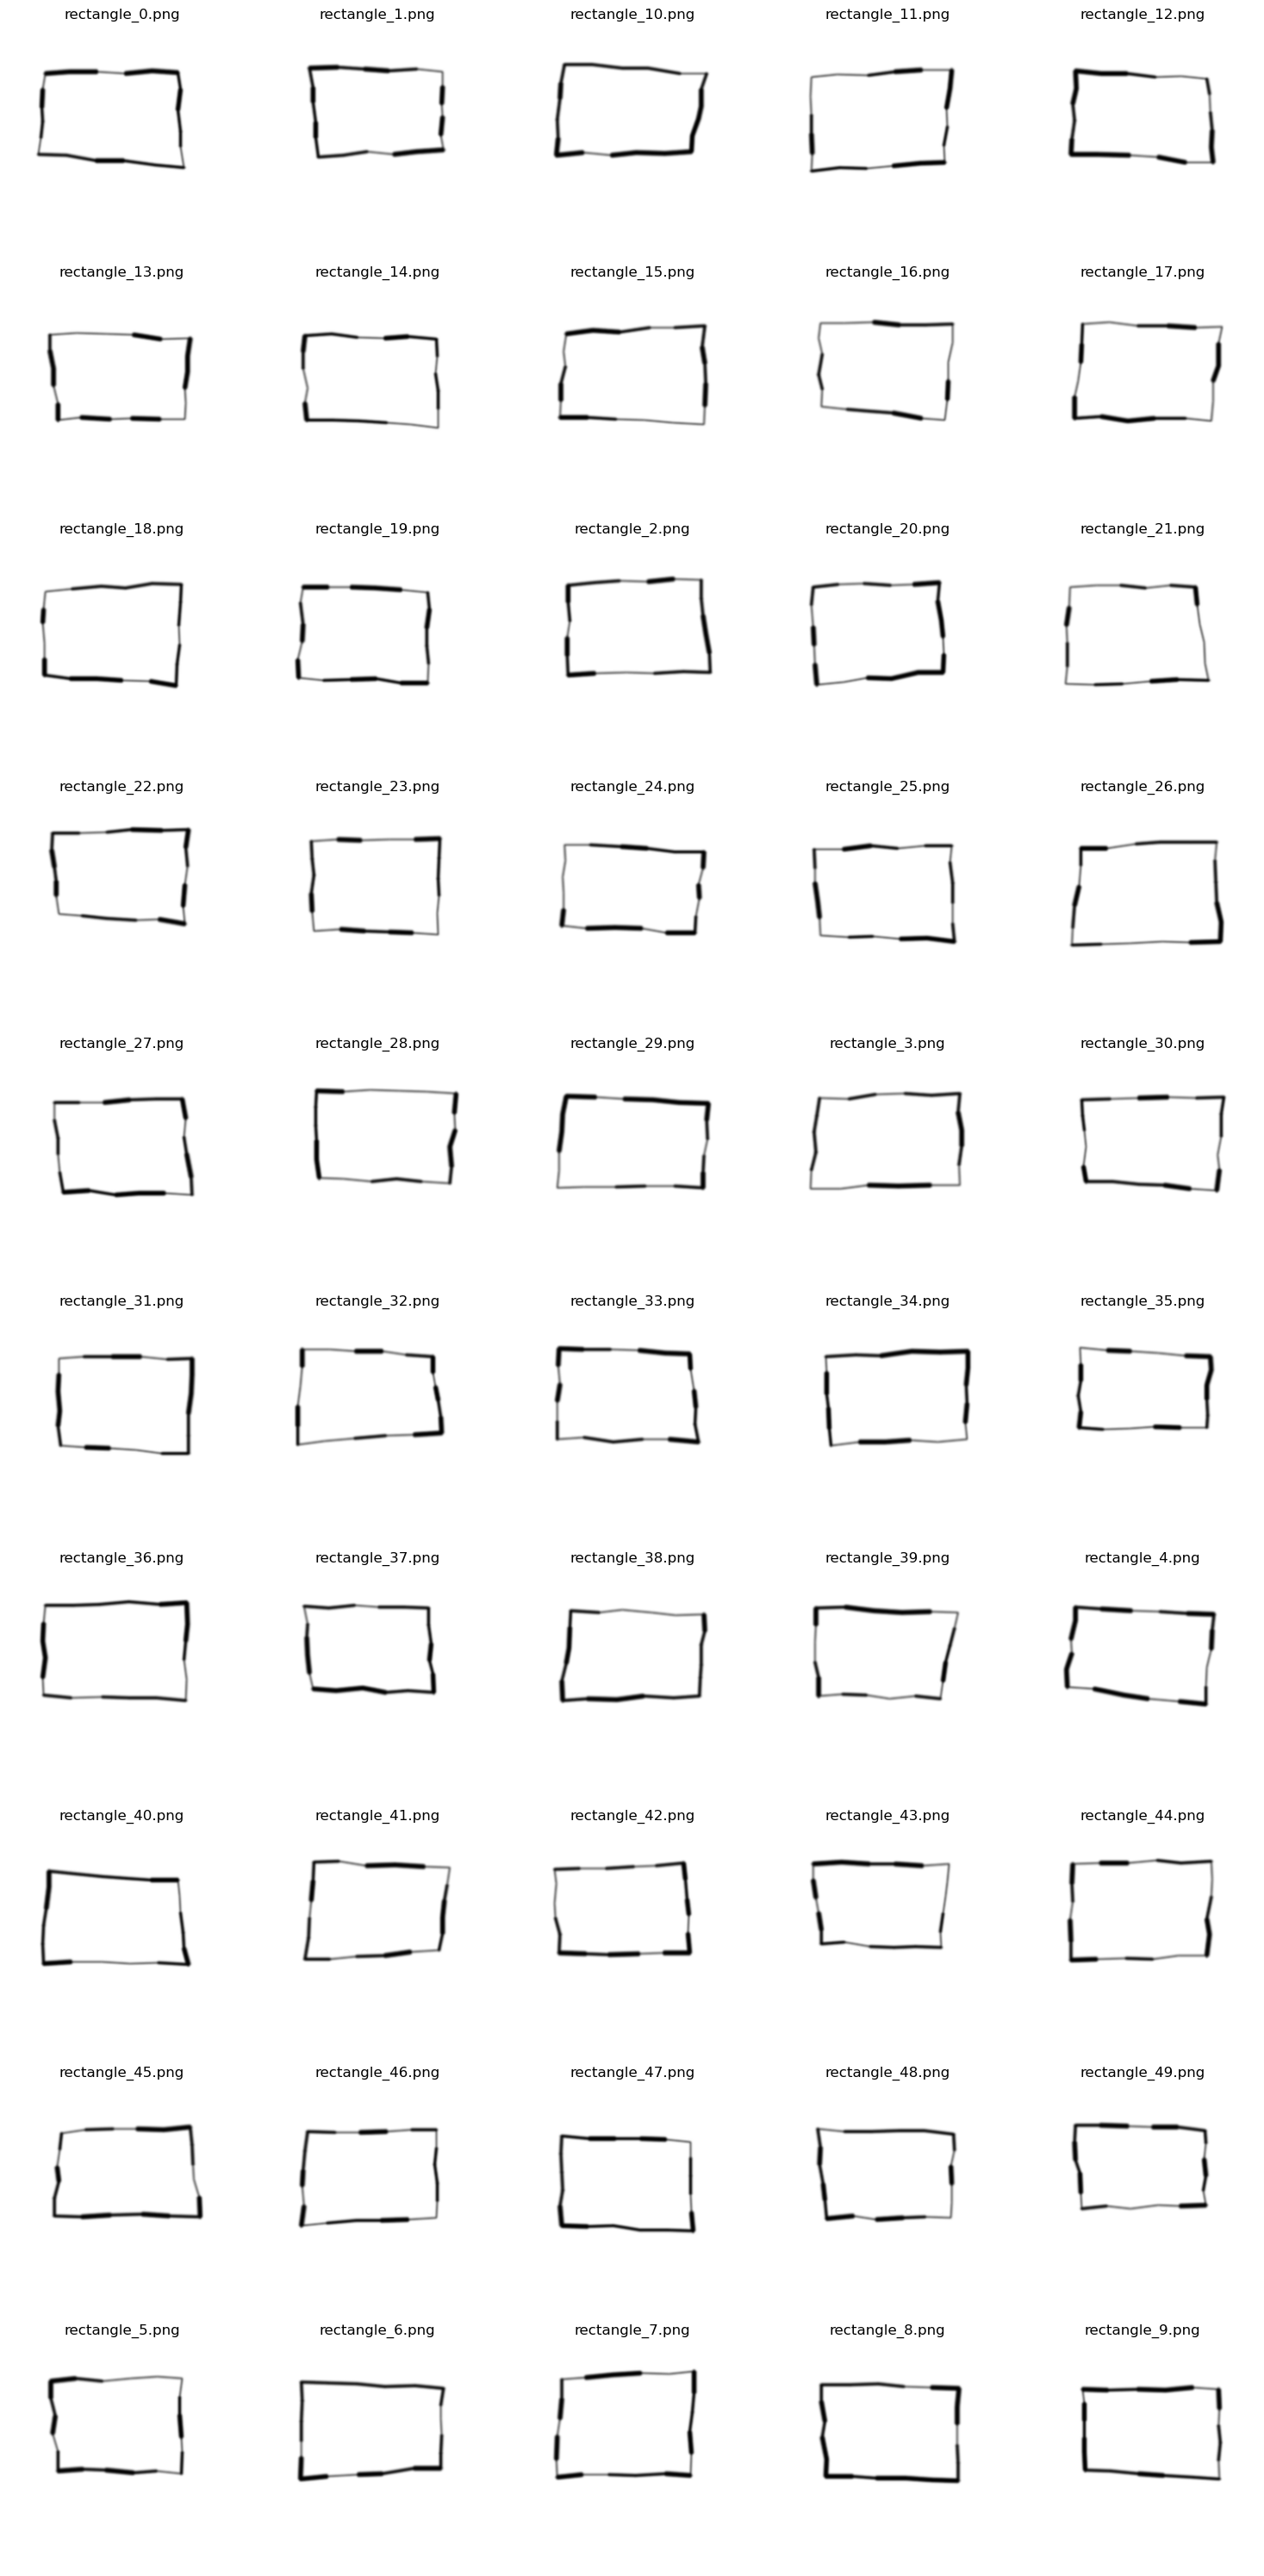

In [40]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'rectangle' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)


for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


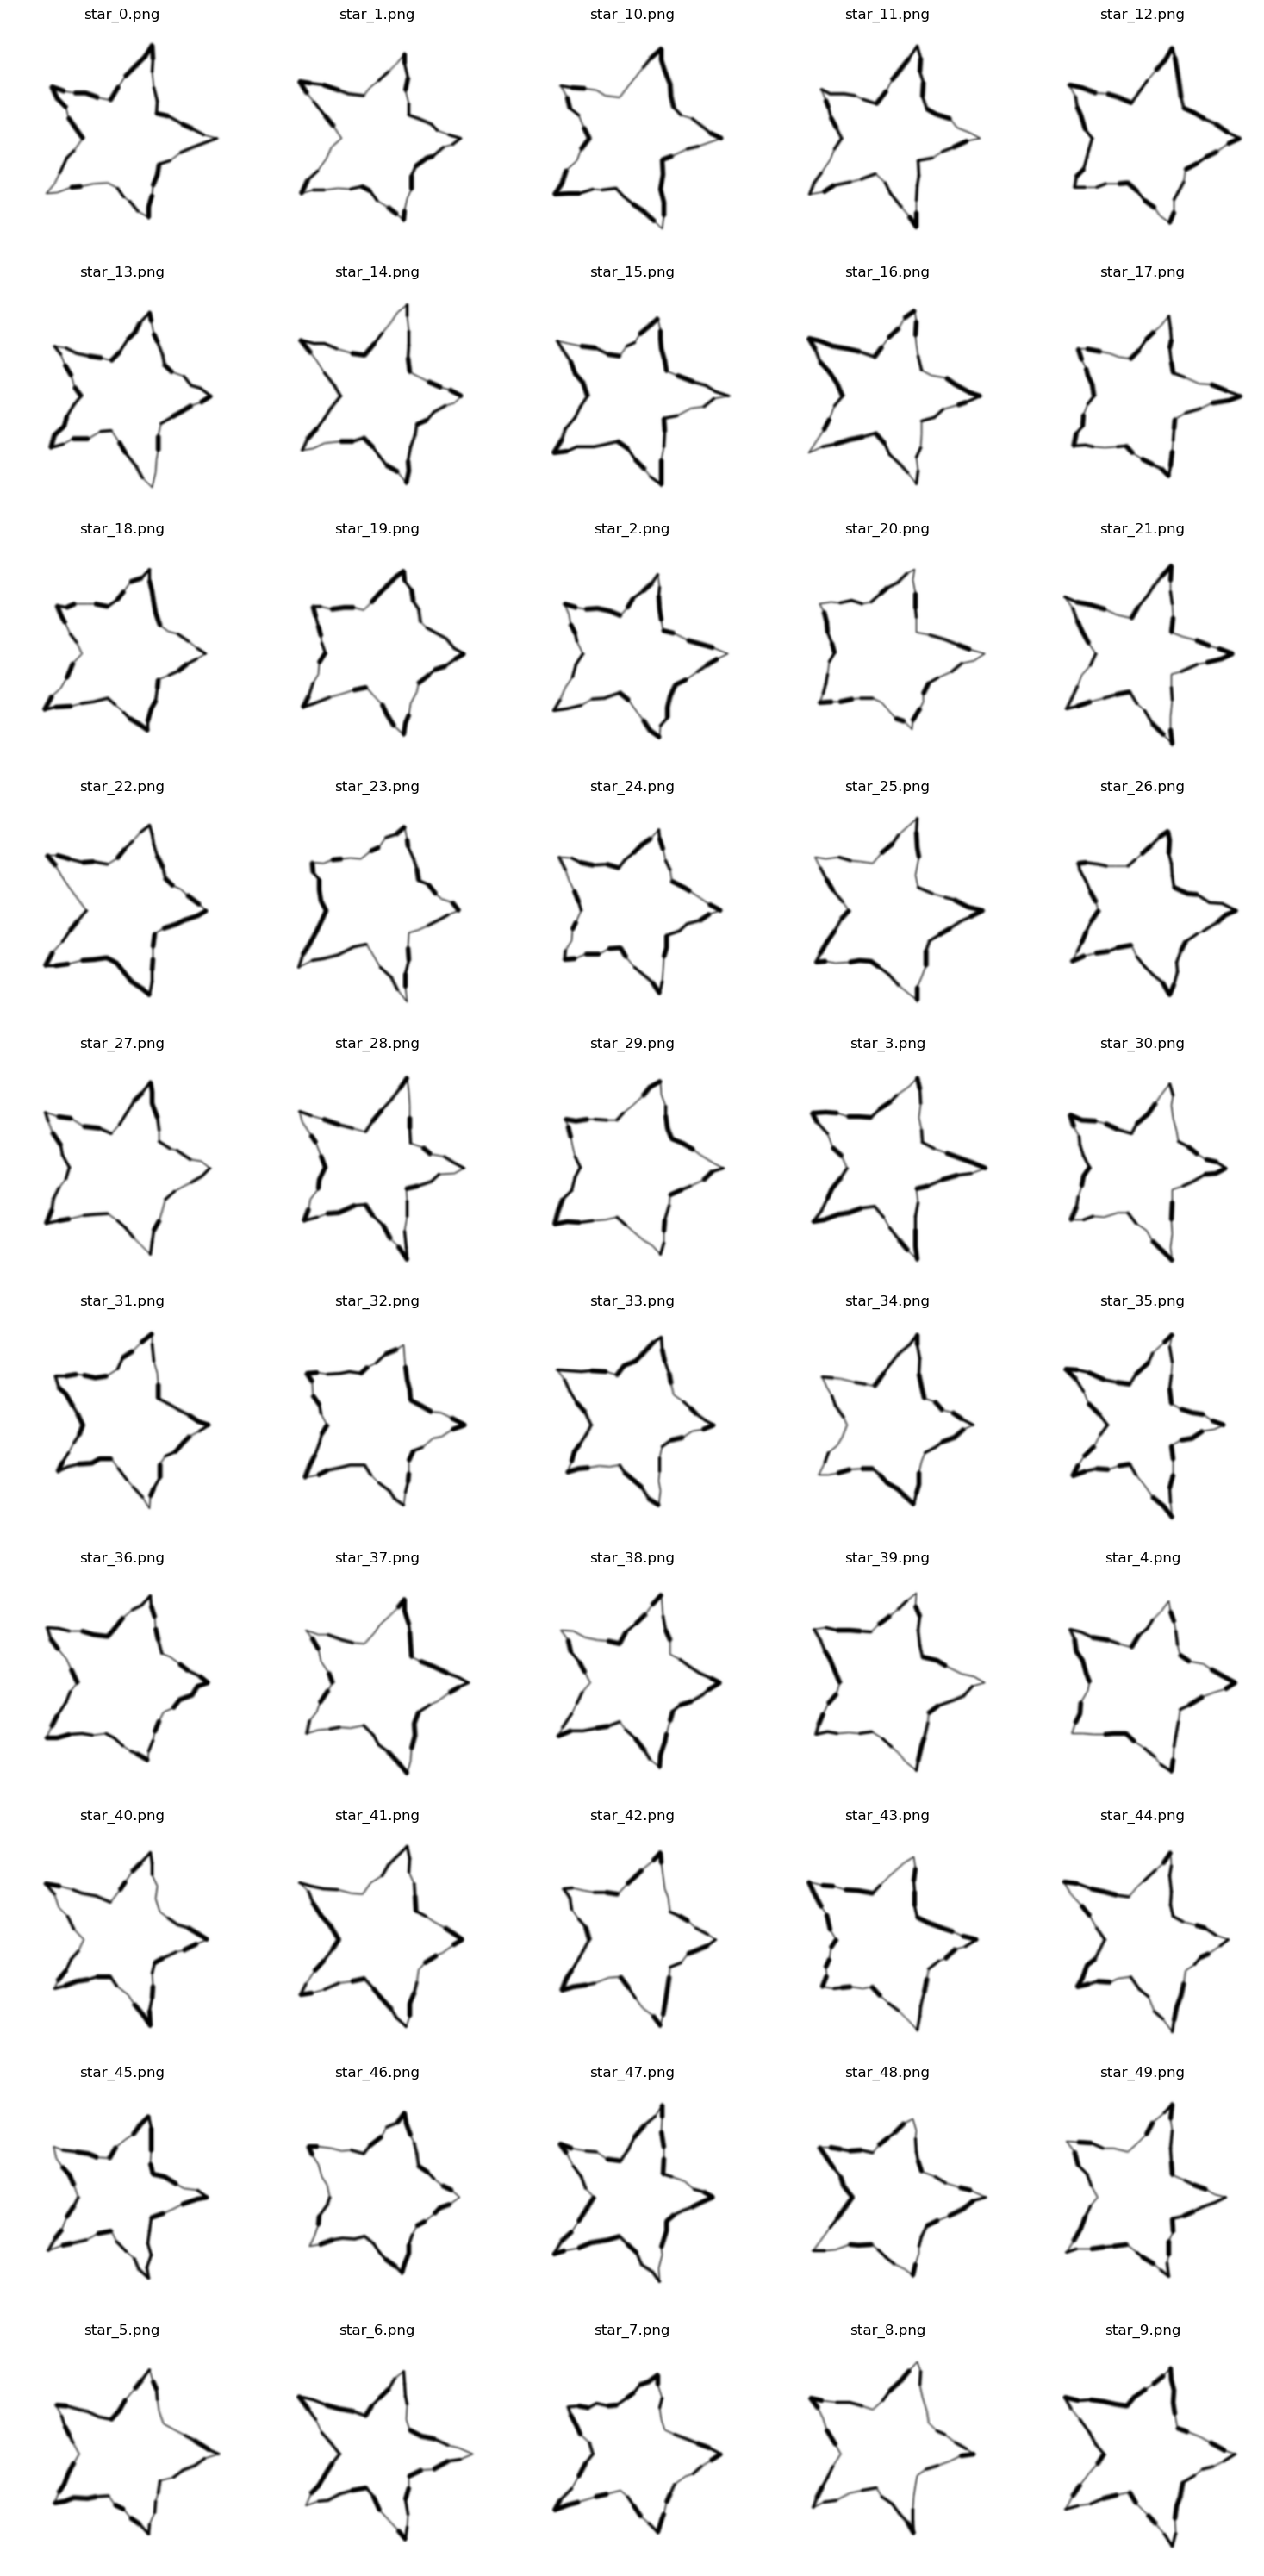

In [47]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'star' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


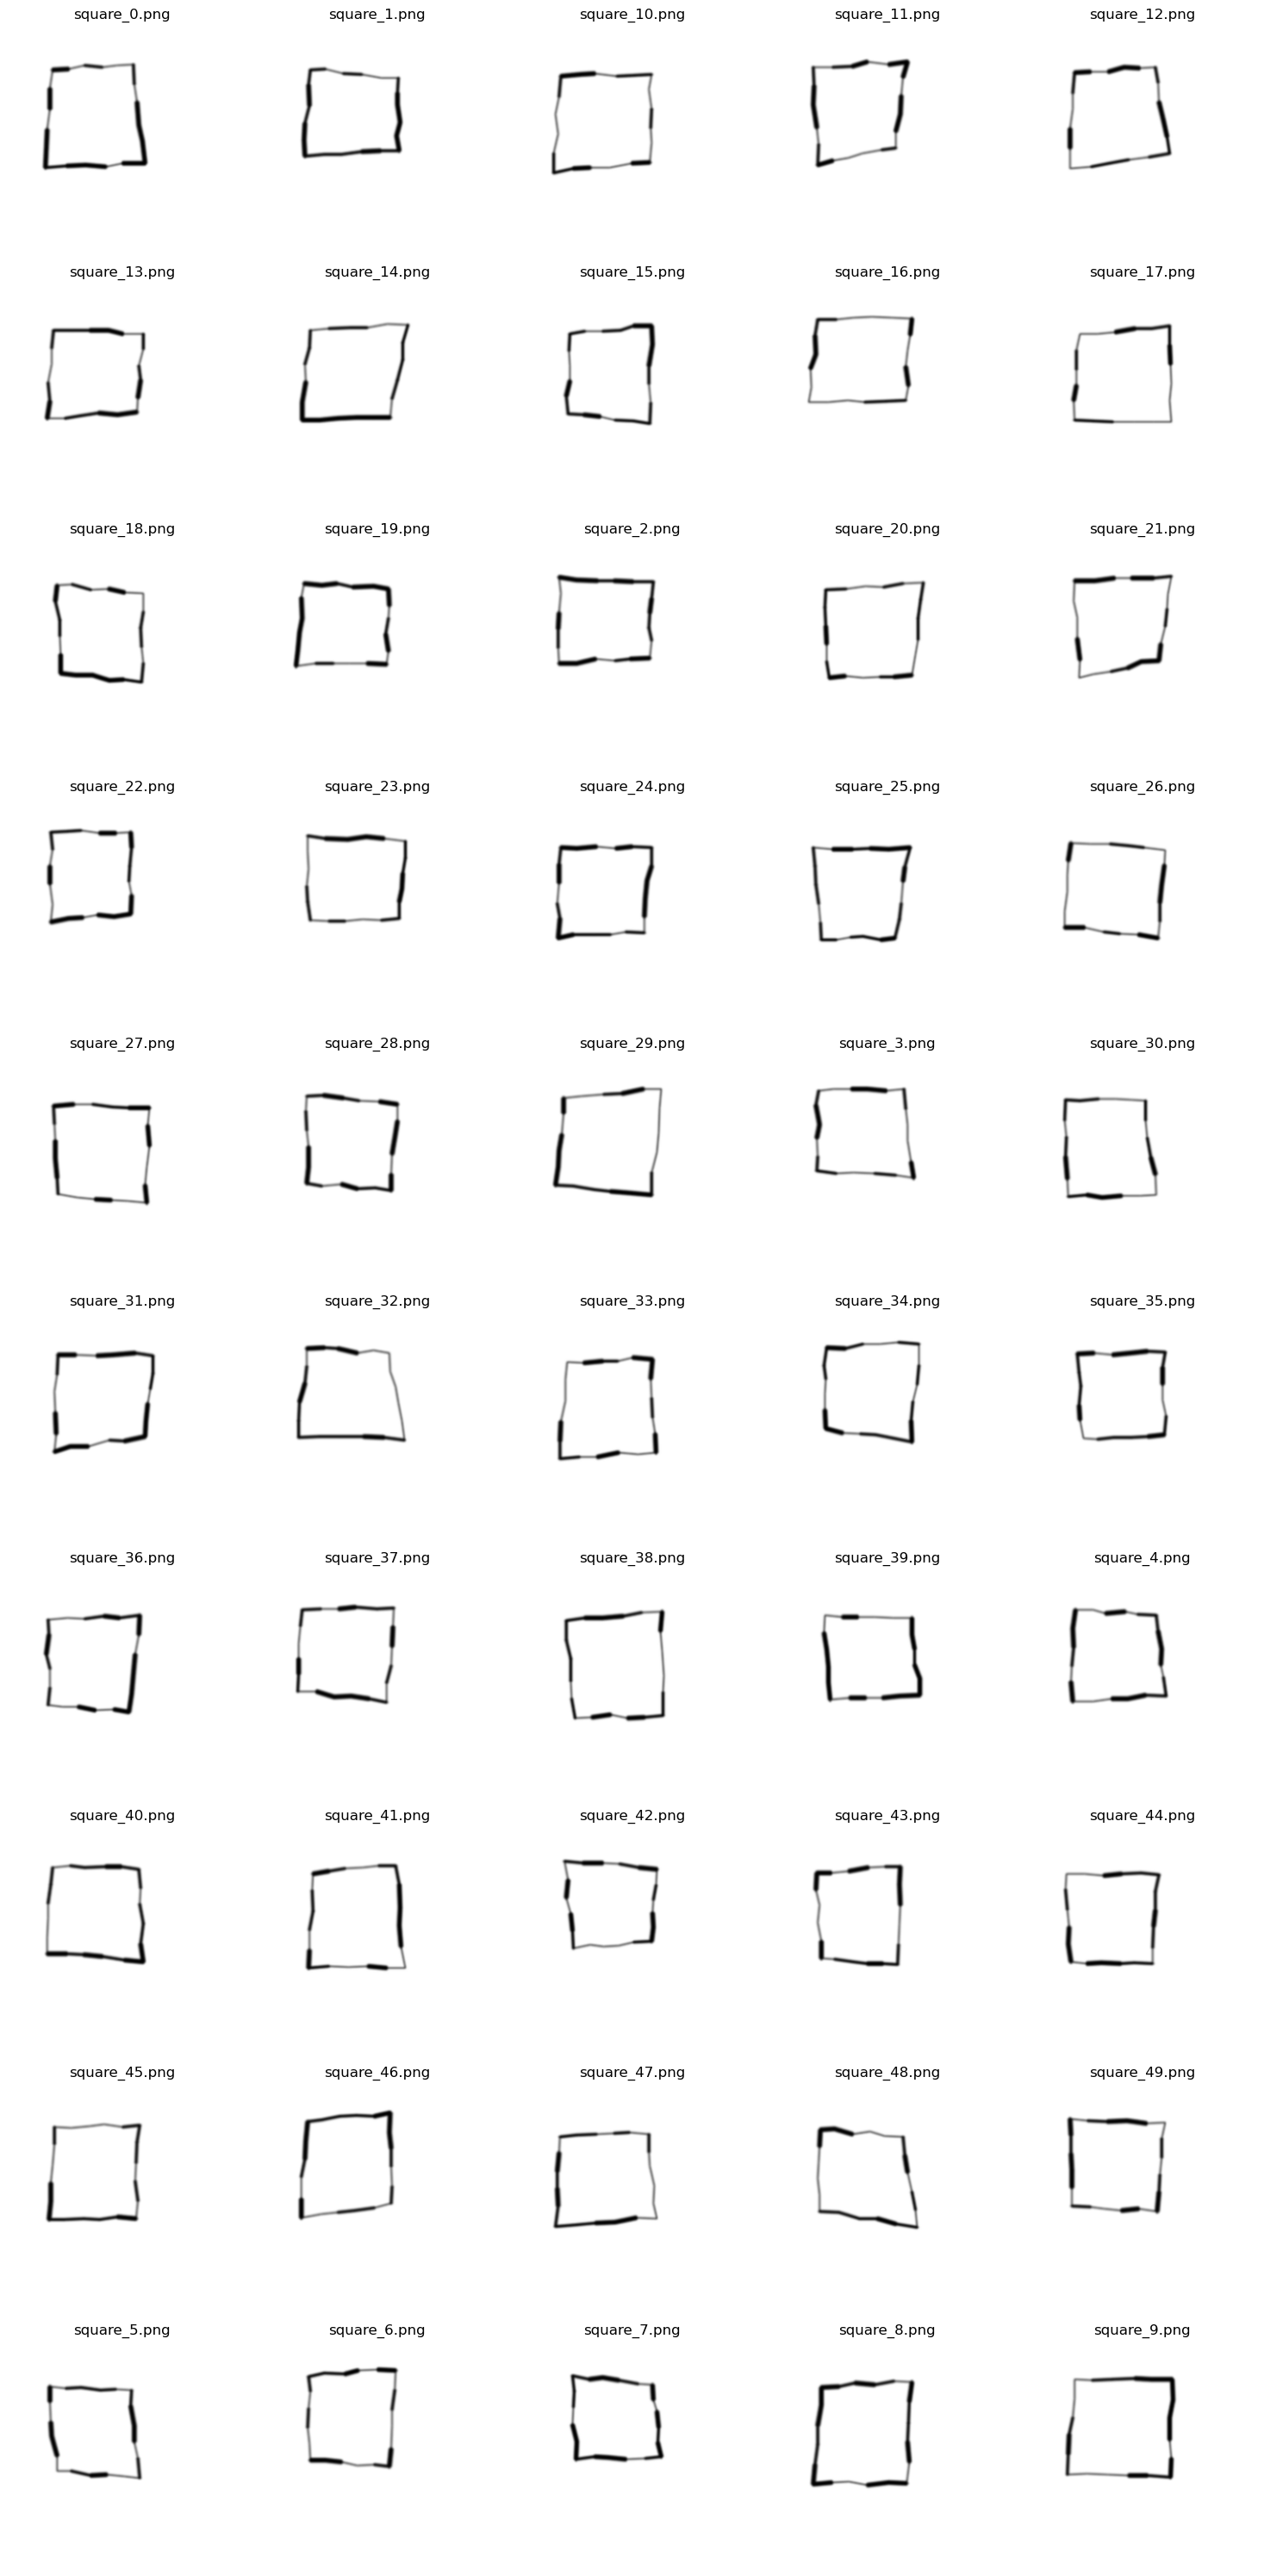

In [51]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'square' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


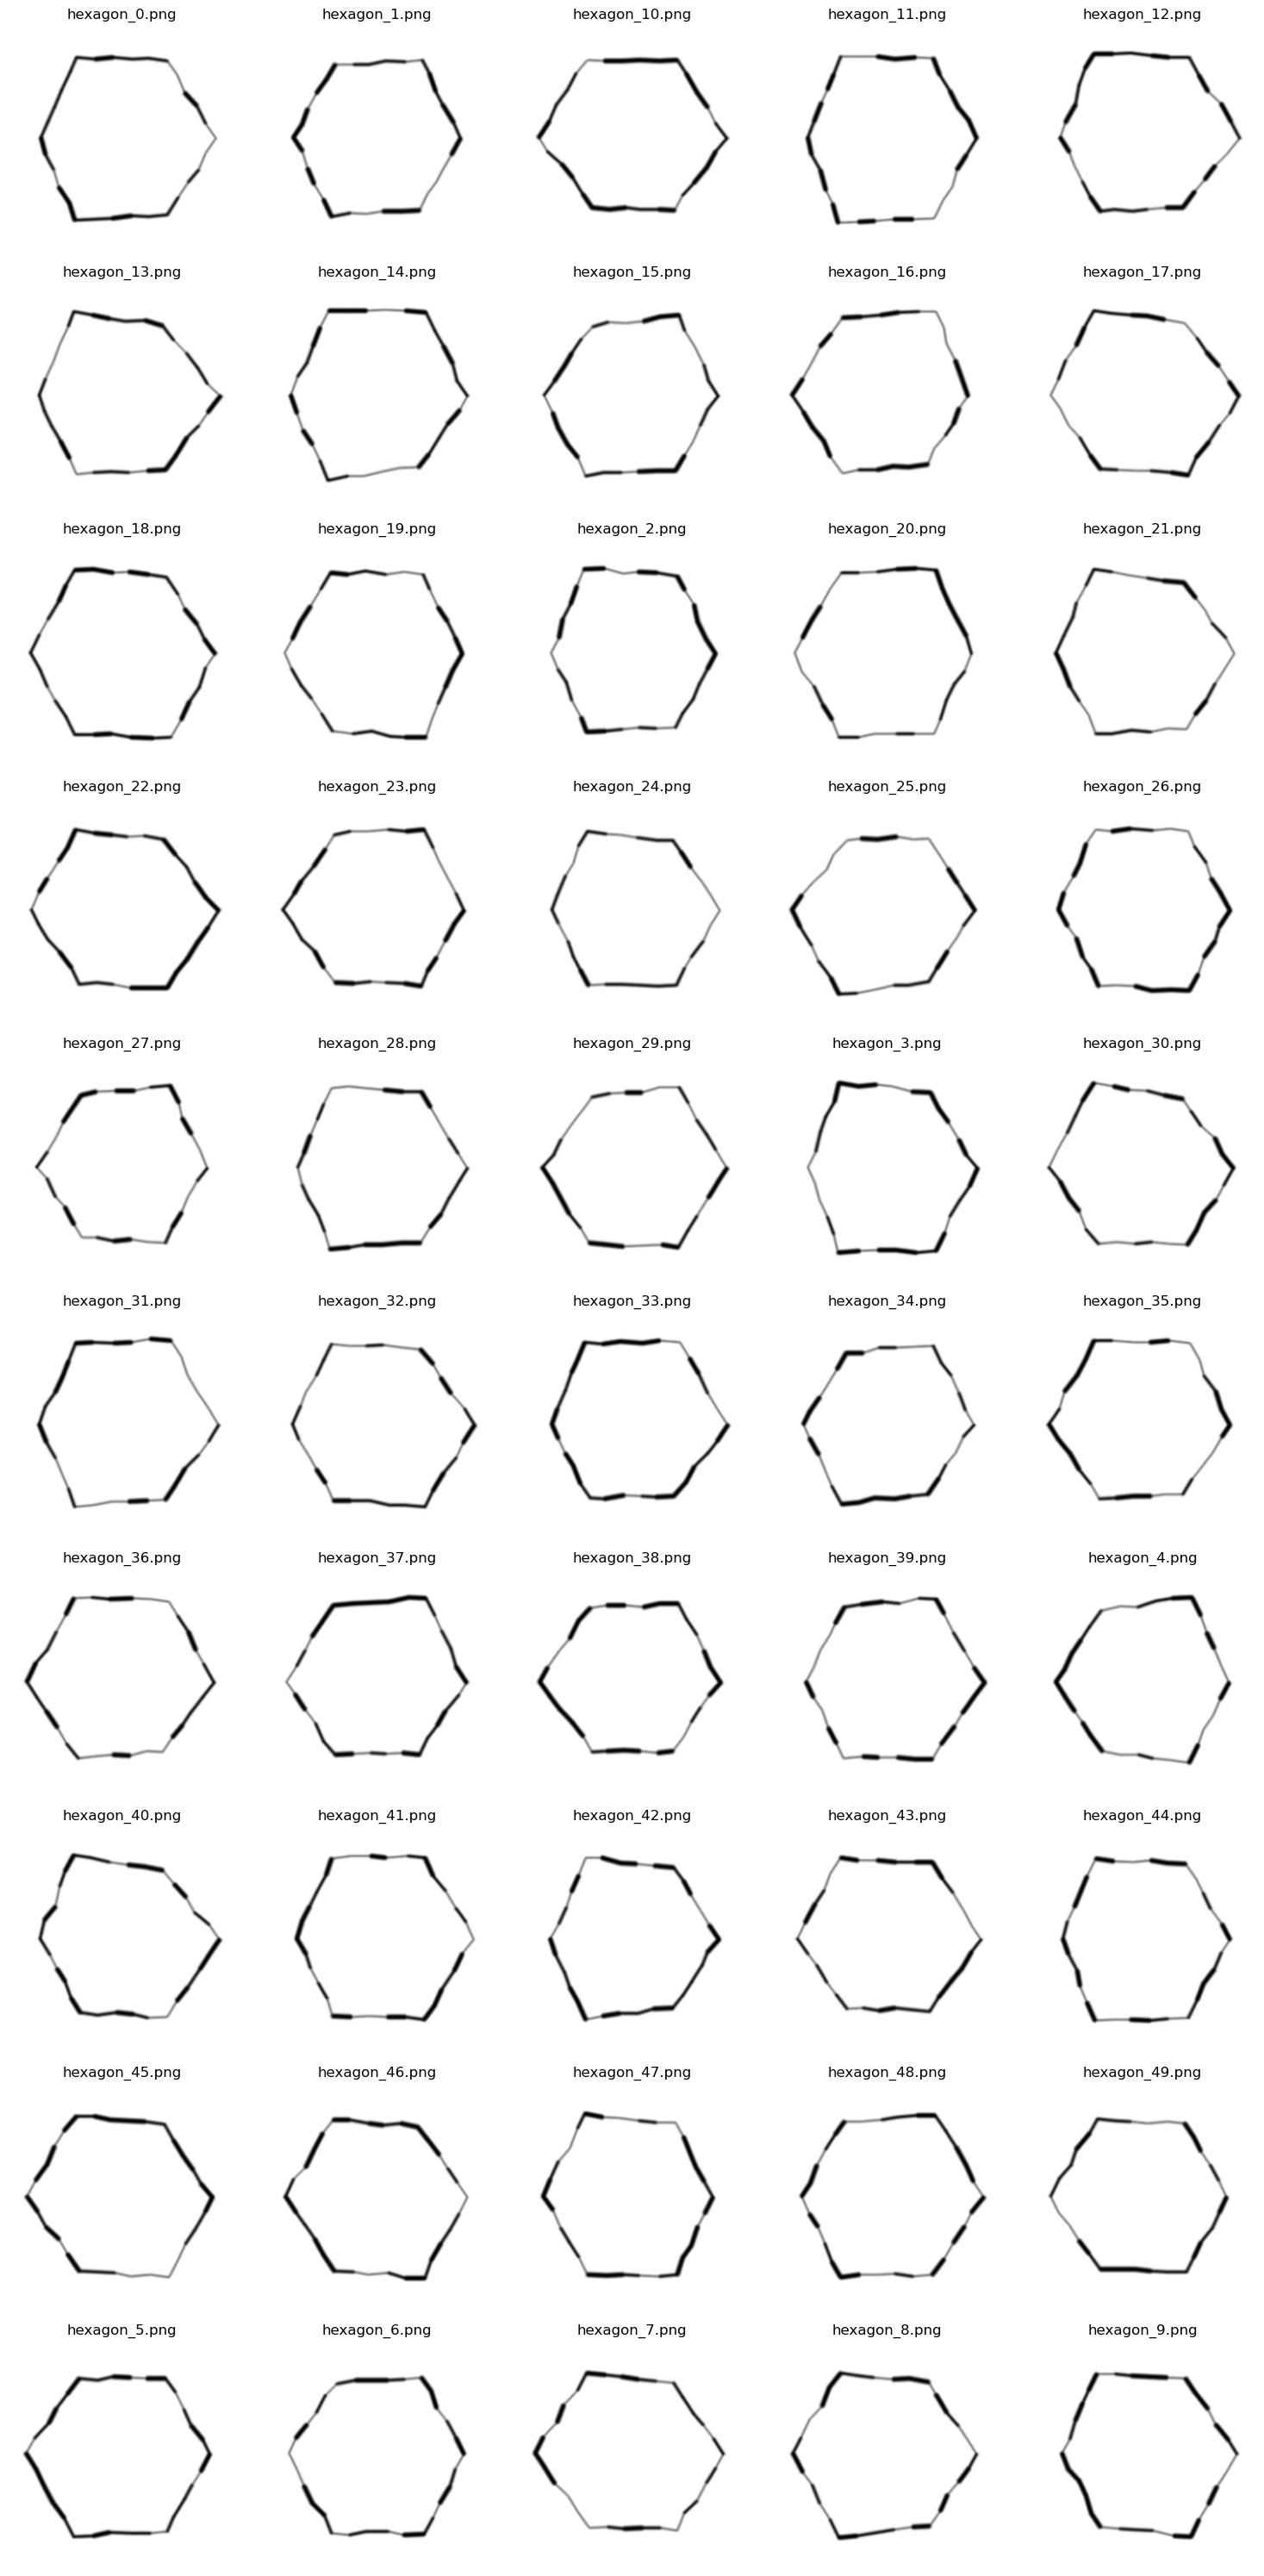

In [56]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'hexagon' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


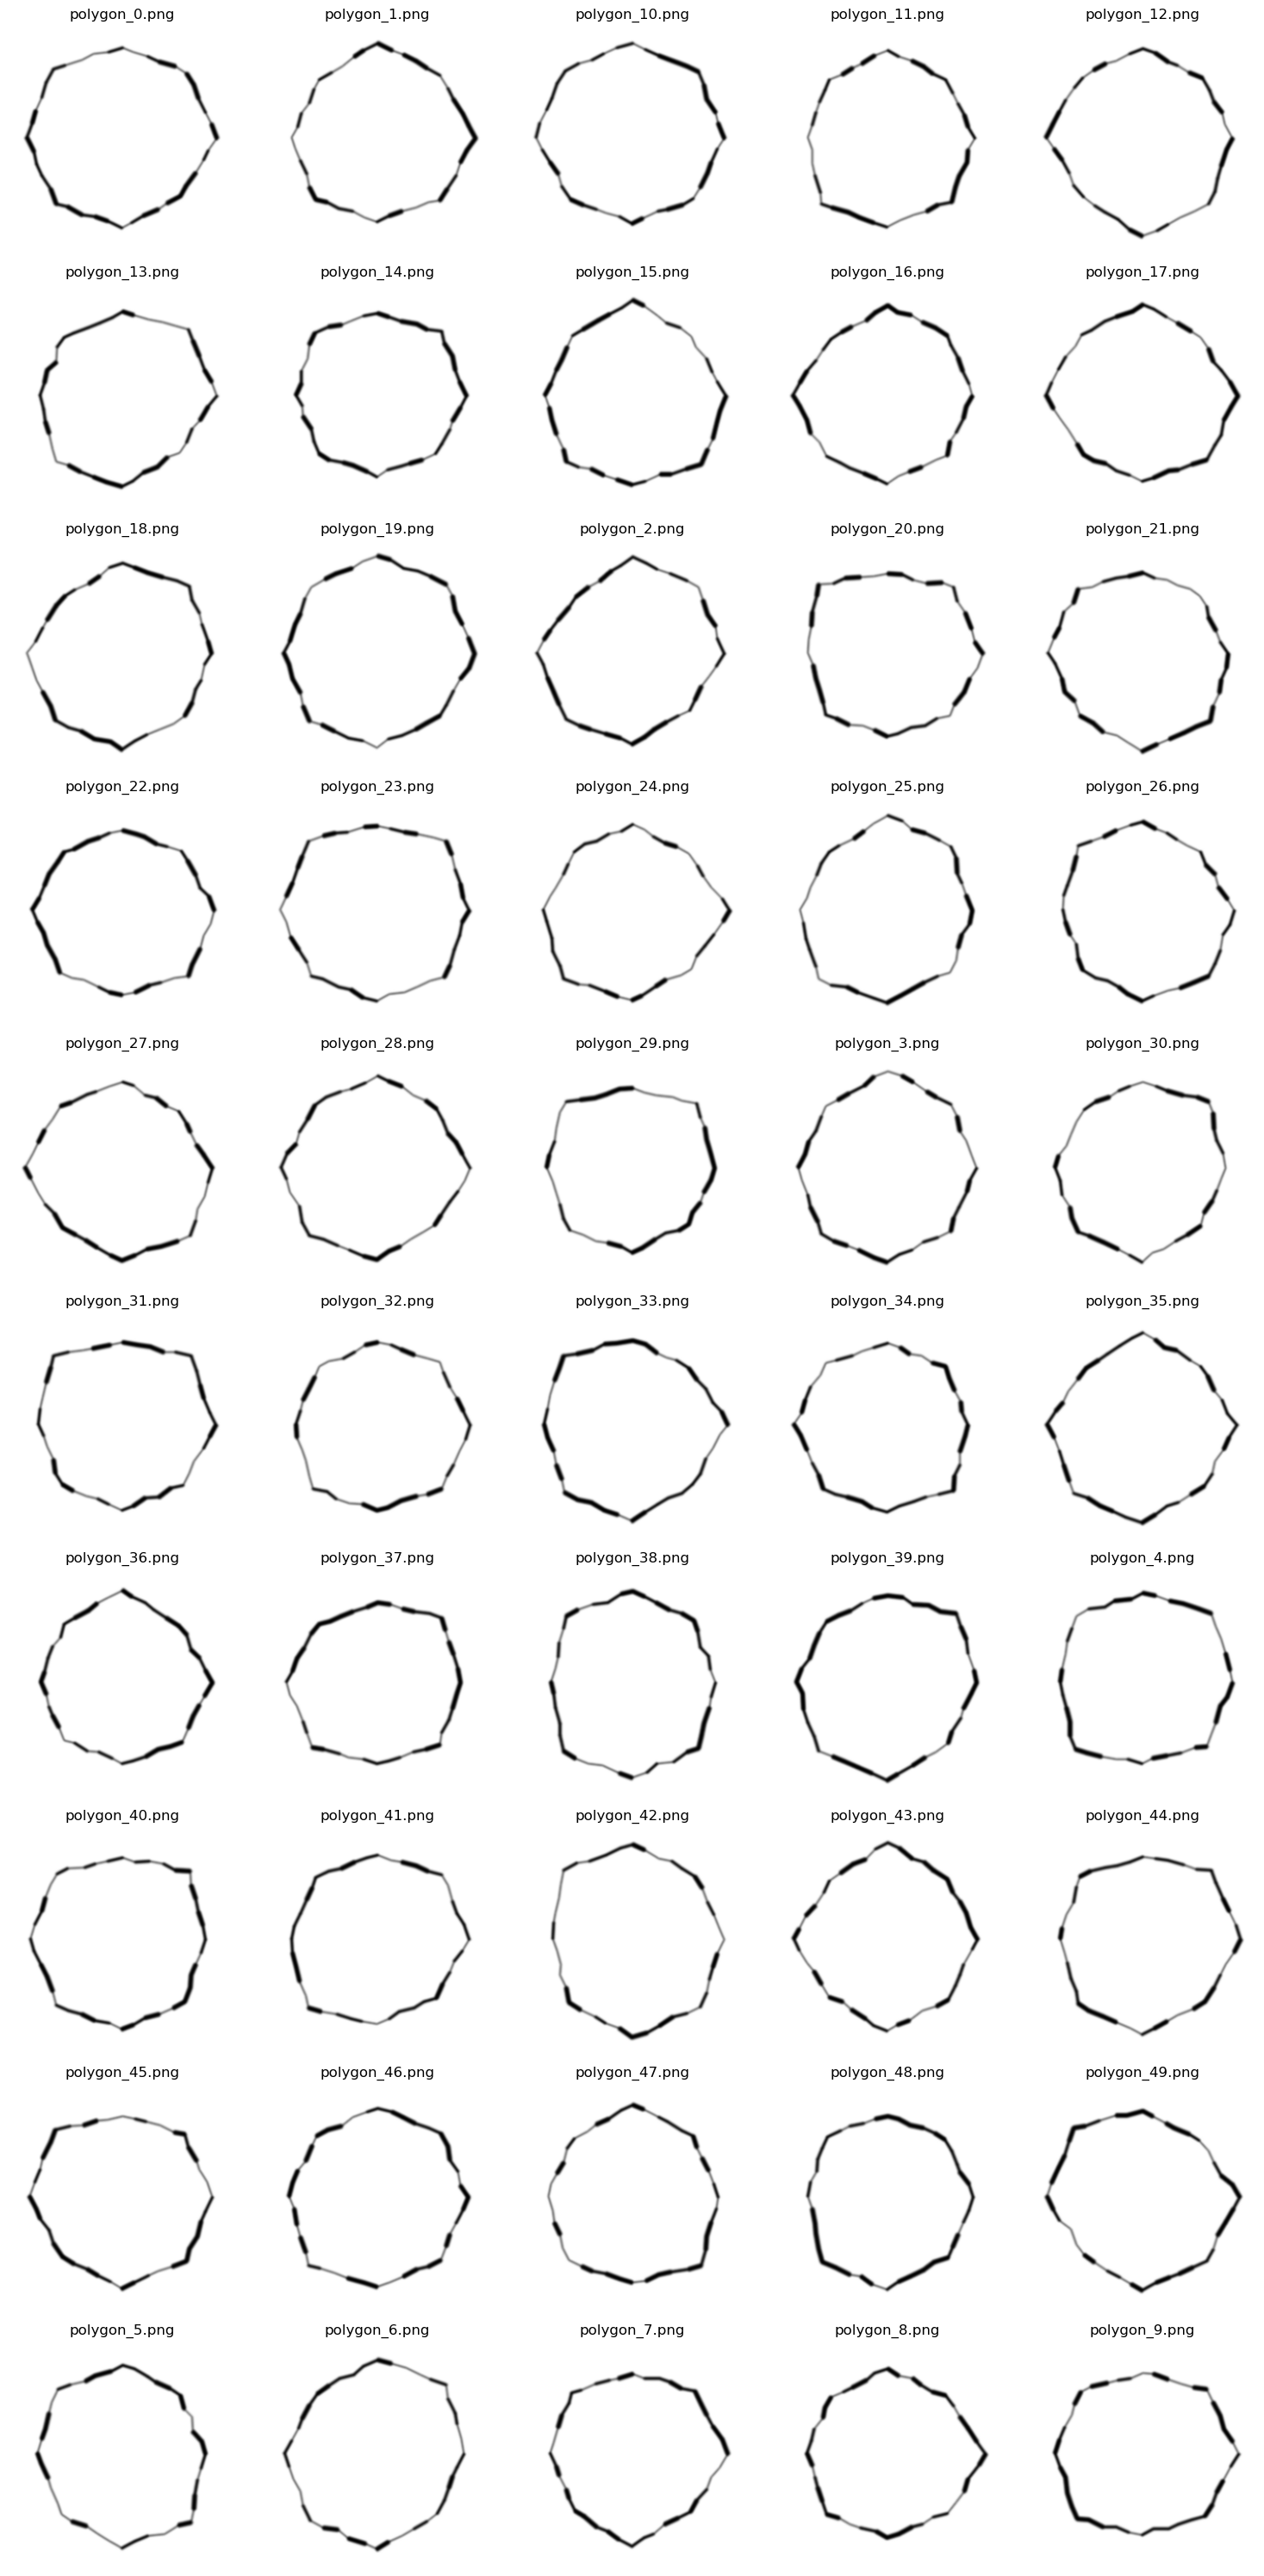

In [57]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'polygon' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

# Plot a few circle images
num_images = len(circle_files)
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

# Hide any empty subplots
for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


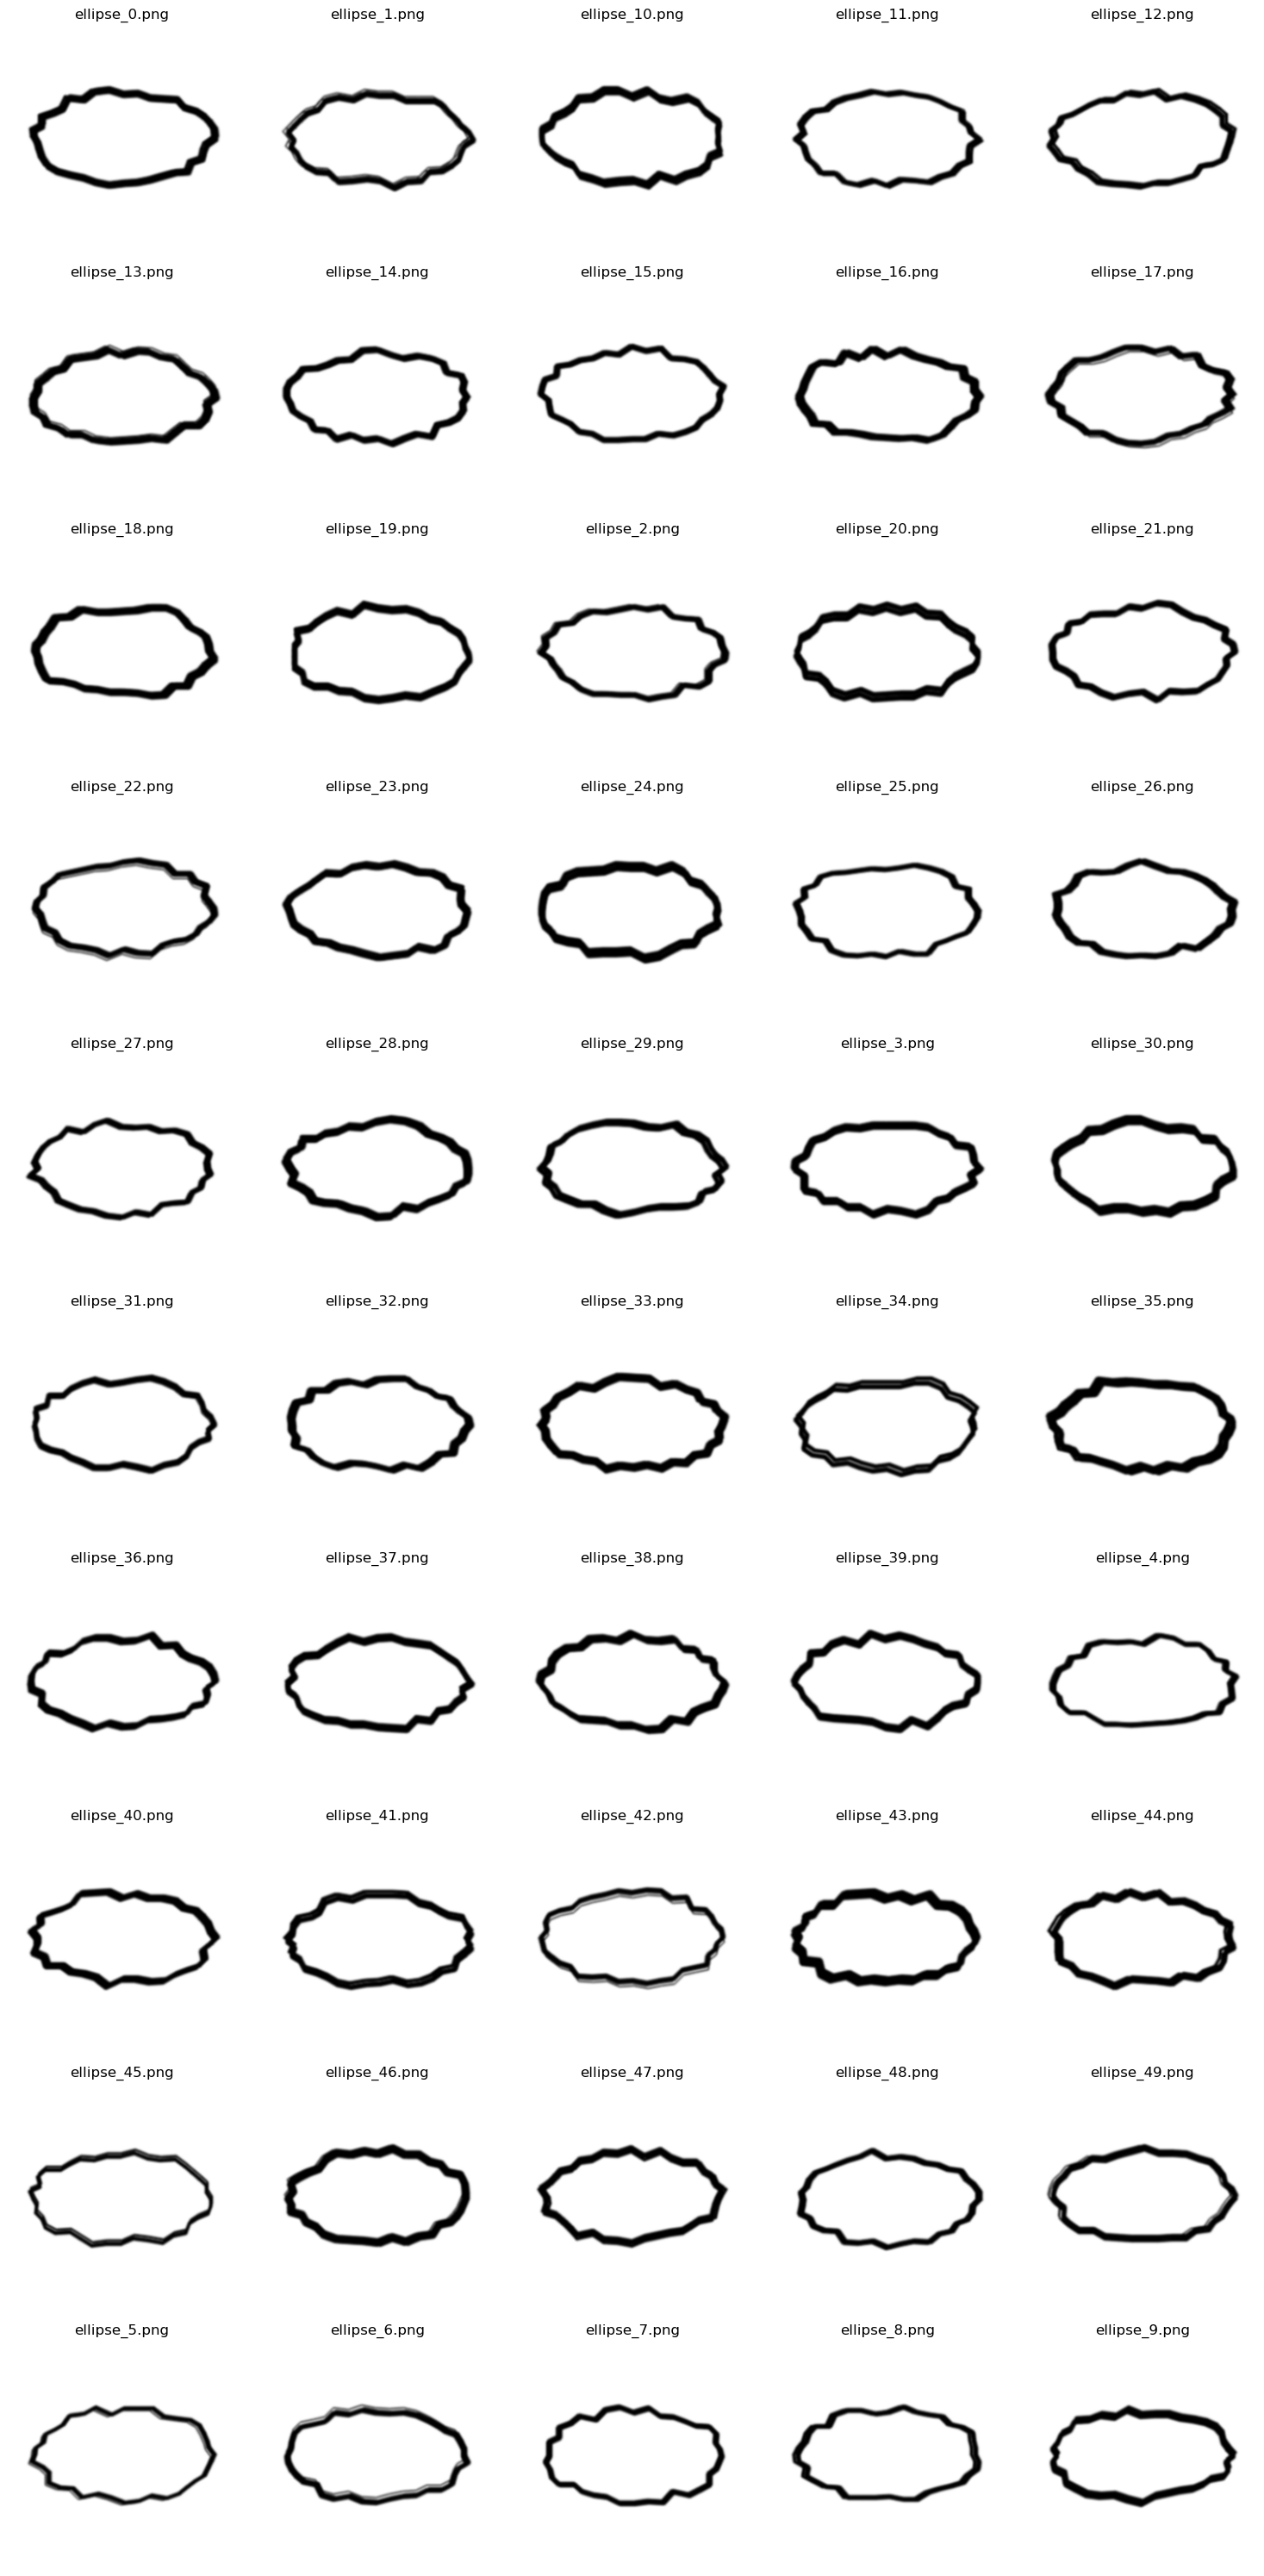

In [67]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'ellipse' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


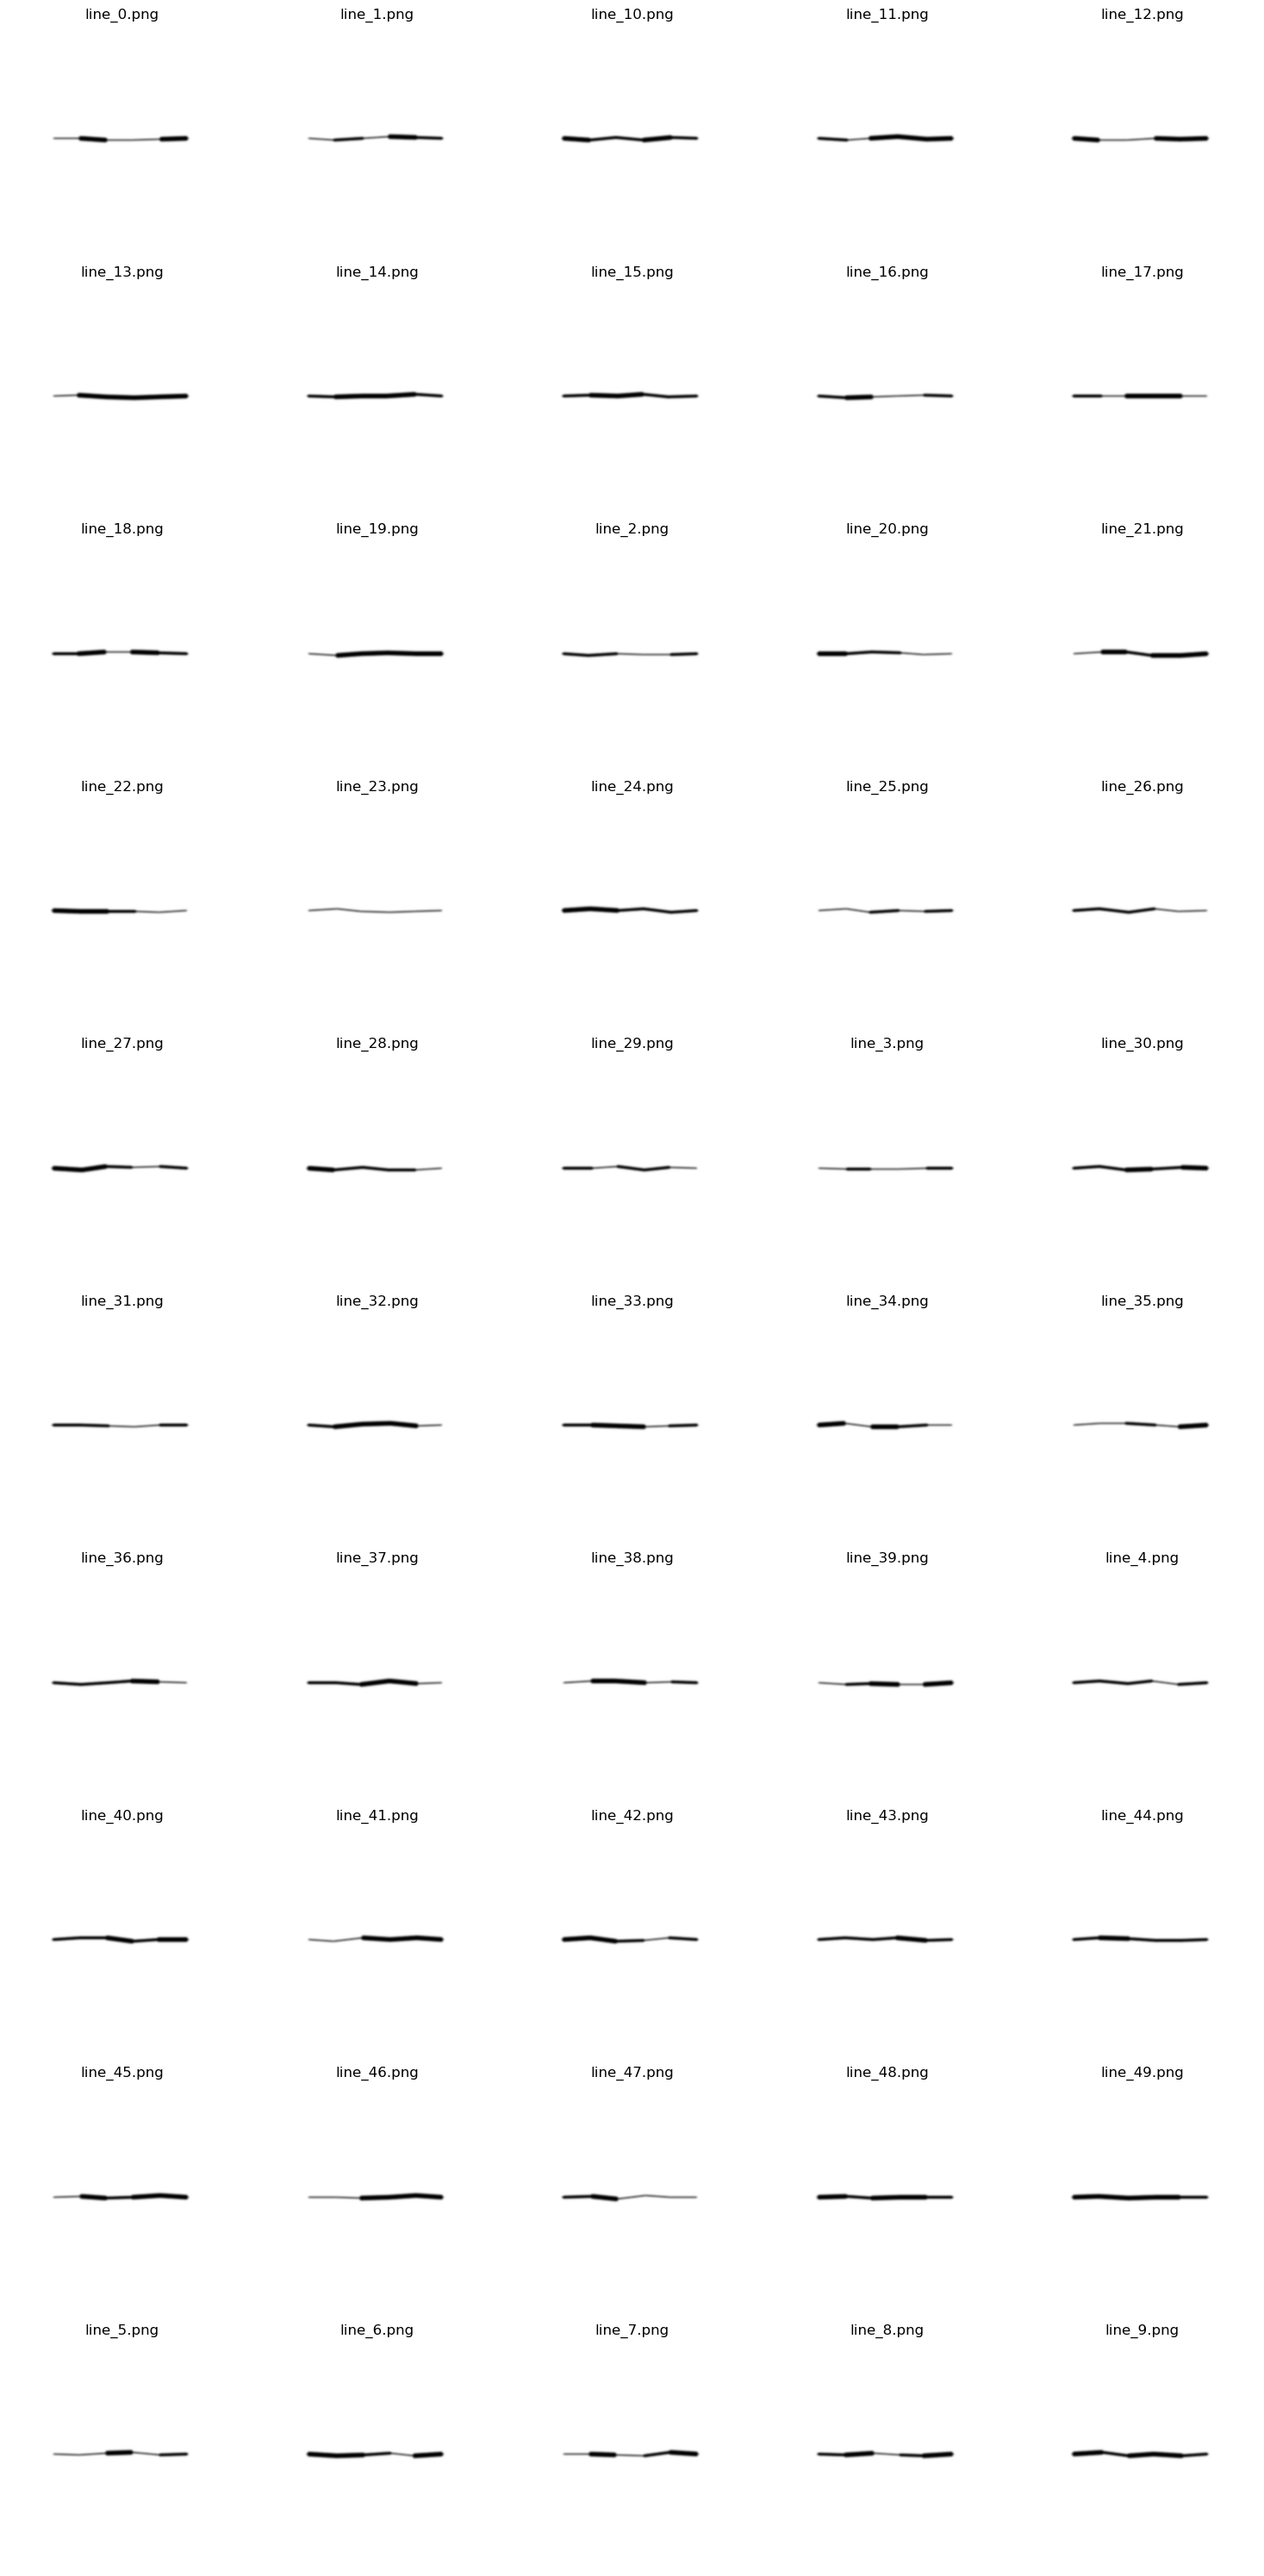

In [71]:
import os
import cv2
import matplotlib.pyplot as plt

output_dir = 'dataset_images/'

circle_files = [f for f in os.listdir(output_dir) if 'line' in f]

def plot_image(image_path, ax):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img_rgb)
    ax.set_title(os.path.basename(image_path))
    ax.axis('off')

num_images = len(circle_files)
cols = 5  
rows = (num_images + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for ax, image_file in zip(axes, circle_files):
    image_path = os.path.join(output_dir, image_file)
    plot_image(image_path, ax)

for ax in axes[len(circle_files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [73]:
files = os.listdir(dataset_dir)

num_images = len(files)

num_images


400

In [1]:
print("asdfghjk")

asdfghjk
